In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time

def minutes(row): 
    return row//60

def duration_trip (row): 
    if 0 <= row <= 15:
        return '[0-15]'
    elif 16 <= row <= 30:
        return '[16-30]'
    elif 31 <= row <= 45 :
        return '[31-45]'
    elif 46 <= row <= 60:
        return '[46-60]'
    else: 
        return '[60+]'
    
n = 1
month = ['January', 'February', 'March', 'April', 'May', 'June']
duration_trip_ny = {}
duration_trip_borough = {}
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

while(n<7):
    csv_path = "C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-0"+str(n)+".csv"
    
    df_taxi= pd.read_csv(csv_path, usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.month == n]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.month <= n+1]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'] != df_taxi['tpep_pickup_datetime']]

    df_join = pd.merge(df_taxi,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])
    
    del df_taxi
    
    df_join['duration'] = df_join['tpep_dropoff_datetime']-df_join['tpep_pickup_datetime']
    df_join = df_join[df_join['duration'].dt.days == 0]
    df_join = df_join[df_join['duration'].dt.seconds <= (3600*4)]

    d_minutes = df_join['duration'].dt.seconds
    
    d_minutes = pd.DataFrame(d_minutes)

    d_minutes = d_minutes['duration'].apply(minutes)

    d_minutes_ny = d_minutes.groupby(d_minutes).count()
    
    duration_trip_ny[month[n-1]] = d_minutes_ny.to_dict()

    df_borough = pd.DataFrame(df_join['Borough'])

    del df_join
    
    df_borough['duration'] = d_minutes
    df_borough = df_borough.groupby(['Borough','duration']).duration.count()

    df_borough = pd.DataFrame(pd.Series(df_borough.to_dict()))
    df_borough.columns = ['n_races']

    df_borough = df_borough.reset_index()
                                      
    df_borough.columns = ['borough', 'minutes', 'n_races']

    df_borough['duration_trip'] = df_borough['minutes'].apply(duration_trip)

    df_borough = df_borough.groupby(['borough', 'duration_trip']).n_races.sum()
                                      
    temp = df_borough.to_dict()

    total_races = {}
    for i in temp: 
        if i[0] not in total_races: 
            total_races[i[0]] = temp[i]
        else: 
            total_races[i[0]] += temp[i]

    d_percentage = {}
    for i in temp: 
        d_percentage[i] = round((temp[i] / total_races[i[0]])*100,1)
        
    duration_trip_borough[month[n-1]] =  d_percentage   
    
    n += 1

Fatto  wow cazzo!
Fatto  wow cazzo!
Fatto  wow cazzo!
Fatto  wow cazzo!
Fatto  wow cazzo!
Fatto  wow cazzo!


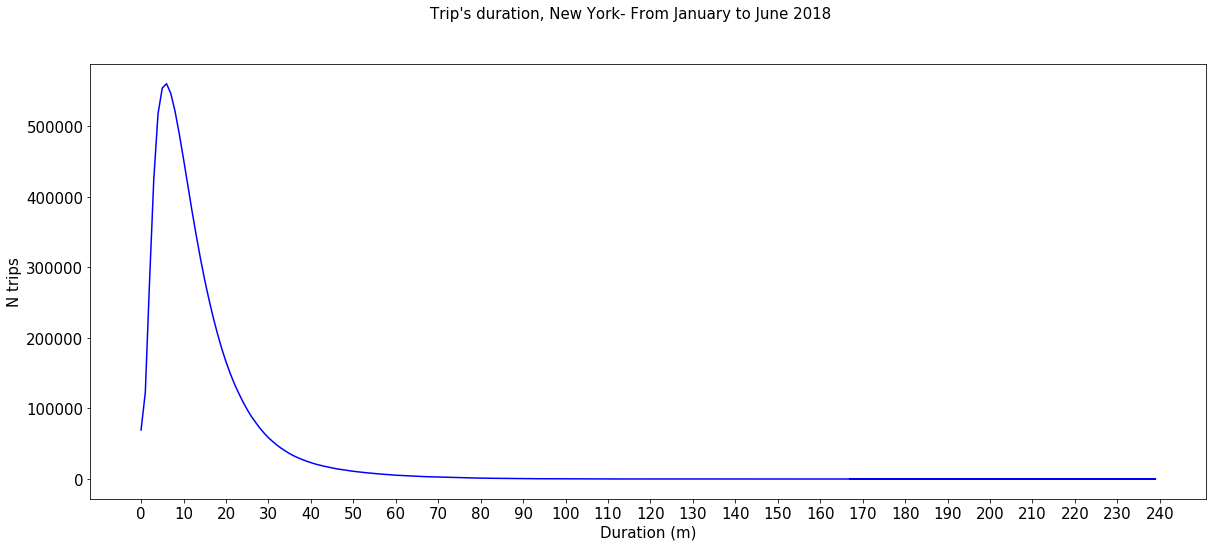

In [56]:
result = {}
for i in duration_trip_ny: 
    for j in duration_trip_ny[i]: 
        if j not in result: 
            result[j] = duration_trip_ny[i][j]
        else: 
            result[j] += duration_trip_ny[i][j]
            
for i in result: 
    result[i] = result[i]//6

result = pd.Series(result)

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(result, color = 'blue')
fig.suptitle("Trip's duration, New York- From January to June 2018",fontsize = 15)
ax.tick_params(labelsize=15)
plt.xlabel('Duration (m)', fontsize=15)
plt.ylabel('N trips', fontsize=15)
plt.xticks(np.arange(0, 241, step=10))
plt.show()


Text(0.5,1,"Trip's duration in percentage for each time slot and borough- From January to June 2018")

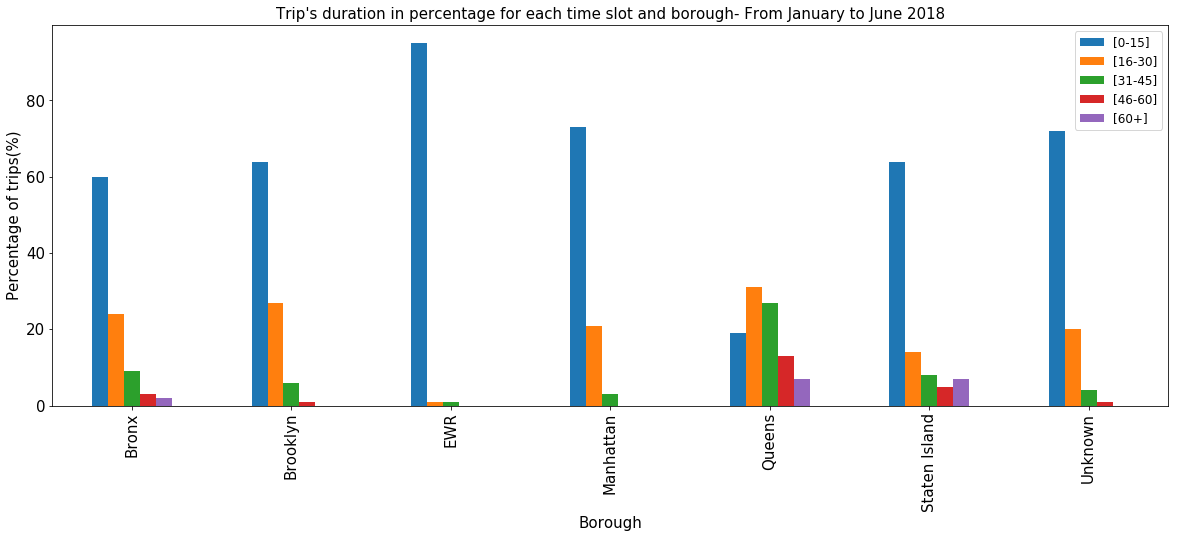

In [58]:
result = {}
for i in duration_trip_borough: 
    for j in duration_trip_borough[i]: 
        if j not in result: 
            result[j] = duration_trip_borough[i][j]
        else: 
            result[j] += duration_trip_borough[i][j]

for i in result: 
    result[i] = result[i]//6

result = pd.Series(result)
ax = result.unstack().plot.bar(figsize =(20,7), fontsize = 15)
ax.set_xlabel("Borough",fontsize=15)
ax.set_ylabel("Percentage of trips(%)",fontsize=15)
ax.legend(fontsize=12)
ax.set_title("Trip's duration in percentage for each time slot and borough- From January to June 2018", fontsize=15)
